In [1]:
import os
import zipfile as zf


In [31]:
local_zip = 'rock_paper.zip'
zip_ref = zf.ZipFile(local_zip, 'r')
zip_ref.extractall('rock_paper')
zip_ref.close()

In [2]:
train_paper_dir = os.path.join('C:/Users/Rishav Kumar Jha/rock_paper/Rock-Paper-Scissors/train/paper')
train_paper_name = os.listdir(train_paper_dir)
print(train_paper_name[:10])

['paper01-000.png', 'paper01-001.png', 'paper01-002.png', 'paper01-003.png', 'paper01-004.png', 'paper01-005.png', 'paper01-006.png', 'paper01-007.png', 'paper01-008.png', 'paper01-009.png']


In [3]:
train_rock_dir = os.path.join('C:/Users/Rishav Kumar Jha/rock_paper/Rock-Paper-Scissors/train/rock')
train_rock_name = os.listdir(train_rock_dir)
print(train_rock_name[:10])

['rock01-000.png', 'rock01-001.png', 'rock01-002.png', 'rock01-003.png', 'rock01-004.png', 'rock01-005.png', 'rock01-006.png', 'rock01-007.png', 'rock01-008.png', 'rock01-009.png']


In [4]:
train_scissors_dir = os.path.join('C:/Users/Rishav Kumar Jha/rock_paper/Rock-Paper-Scissors/train/scissors')
train_scissors_name = os.listdir(train_scissors_dir)
print(train_scissors_name[:10])

['scissors01-000.png', 'scissors01-001.png', 'scissors01-002.png', 'scissors01-003.png', 'scissors01-004.png', 'scissors01-005.png', 'scissors01-006.png', 'scissors01-007.png', 'scissors01-008.png', 'scissors01-009.png']


In [5]:
print('Total training paper images:', len(os.listdir(train_paper_dir)))
print('Total training rock images:', len(os.listdir(train_rock_dir)))
print('Total training scissors images:', len(os.listdir(train_scissors_dir)))

Total training paper images: 840
Total training rock images: 840
Total training scissors images: 840


In [6]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import matplotlib.image as npimg

In [7]:
nrows, ncols = 4, 4
pic_index = 0

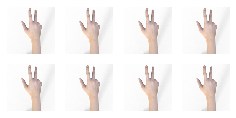

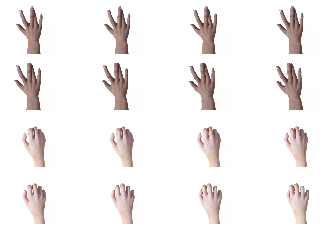

In [8]:
fig = plt.gcf()
fig.set_size_inches(4, 4)

pic_index+=8

next_paper_pix = [os.path.join(train_paper_dir, fname) for fname in train_paper_name[pic_index-8: pic_index]]

next_rock_pix = [os.path.join(train_rock_dir, fname) for fname in train_rock_name[pic_index-8: pic_index]]

next_scissors_pix = [os.path.join(train_scissors_dir, fname) for fname in train_scissors_name[pic_index-8: pic_index]]
for f, img_path in enumerate(next_scissors_pix):
    sp = plt.subplot(nrows, ncols, f+1)
    sp.axis('off')
    
    img = npimg.imread(img_path)
    plt.imshow(img)

plt.show()

for i, img_path in enumerate(next_paper_pix + next_rock_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = npimg.imread(img_path)
    plt.imshow(img)

plt.show()



In [9]:

import tensorflow as tf



model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            #tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),
            #tf.keras.layers.Dense(1024, activation=tf.nn.relu),
            tf.keras.layers.Dense(512, activation=tf.nn.relu),
            #tf.keras.layers.Dense(256, activation=tf.nn.relu),
            #tf.keras.layers.Dense(128, activation=tf.nn.relu),
            #tf.keras.layers.Dense(64, activation=tf.nn.relu),
            tf.keras.layers.Dense(3, activation='sigmoid')
        
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(lr=0.001), metrics = ['acc'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 40,
                                   width_shift_range = 0.2, height_shift_range = 0.2,
                                   shear_range = 0.2, zoom_range = 0.2,
                                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory('C:/Users/Rishav Kumar Jha/rock_paper/Rock-Paper-Scissors/train',
                                                   target_size = (64, 64),
                                                   batch_size = 42,
                                                   shuffle = True,
                                                   class_mode = 'categorical')

Found 2520 images belonging to 3 classes.


In [105]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 60,
                             epochs = 20,
                             verbose = 1)

Epoch 1/20
60/60 [==============================] - 11s 181ms/step - loss: 0.1377 - acc: 0.94842s - loss: 0.1431 
Epoch 2/20
60/60 [==============================] - 11s 186ms/step - loss: 0.1209 - acc: 0.9563
Epoch 3/20
60/60 [==============================] - 12s 198ms/step - loss: 0.1170 - acc: 0.9635
Epoch 4/20
60/60 [==============================] - 12s 200ms/step - loss: 0.1108 - acc: 0.9619
Epoch 5/20
60/60 [==============================] - 12s 196ms/step - loss: 0.0977 - acc: 0.9694
Epoch 6/20
60/60 [==============================] - 12s 196ms/step - loss: 0.0849 - acc: 0.9694
Epoch 7/20
60/60 [==============================] - 12s 196ms/step - loss: 0.0776 - acc: 0.9698
Epoch 8/20
60/60 [==============================] - 12s 198ms/step - loss: 0.0673 - acc: 0.9730
Epoch 9/20
60/60 [==============================] - 12s 197ms/step - loss: 0.0853 - acc: 0.9702
Epoch 10/20
60/60 [==============================] - 12s 196ms/step - loss: 0.0543 - acc: 0.9806
Epoch 11/20
60/60 [==

In [12]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    'C:/Users/Rishav Kumar Jha/rock_paper/Rock-Paper-Scissors/test',
    target_size = (64, 64),
    batch_size = 31,
    shuffle = True, 
    class_mode = 'categorical')

Found 372 images belonging to 3 classes.


In [13]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 60,
                             epochs = 20,
                             verbose = 1,
                             validation_data = validation_generator,
                             validation_steps = 12)

Epoch 1/20
60/60 [==============================] - 113s 2s/step - loss: 1.0467 - acc: 0.4381 - val_loss: 0.7425 - val_acc: 0.8495
Epoch 2/20
60/60 [==============================] - 12s 208ms/step - loss: 0.7677 - acc: 0.6635 - val_loss: 0.3772 - val_acc: 0.9435
Epoch 3/20
60/60 [==============================] - 13s 214ms/step - loss: 0.5751 - acc: 0.7579 - val_loss: 0.6222 - val_acc: 0.6935
Epoch 4/20
60/60 [==============================] - 14s 228ms/step - loss: 0.4589 - acc: 0.8254 - val_loss: 0.3570 - val_acc: 0.7984
Epoch 5/20
60/60 [==============================] - 14s 228ms/step - loss: 0.3658 - acc: 0.8619 - val_loss: 0.1239 - val_acc: 0.9543
Epoch 6/20
60/60 [==============================] - 14s 231ms/step - loss: 0.2859 - acc: 0.8948 - val_loss: 0.2731 - val_acc: 0.8925
Epoch 7/20
60/60 [==============================] - 14s 229ms/step - loss: 0.2359 - acc: 0.9067 - val_loss: 0.1687 - val_acc: 0.9516
Epoch 8/20
60/60 [==============================] - 14s 229ms/step - lo

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

<Figure size 432x288 with 0 Axes>

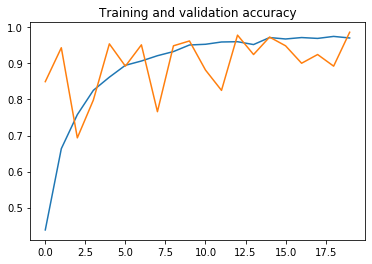

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

<Figure size 432x288 with 0 Axes>

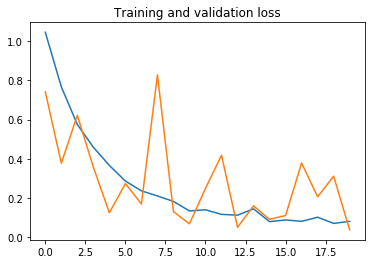

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.figure()